<a href="https://colab.research.google.com/github/amaljoseph/TensorflowLearnings/blob/master/TFEstimatorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [0]:
x_data = np.linspace(0.0, 10, 1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5)*x_data + 5 + noise

In [0]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [19]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmptlnk6s_i', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9ee4c45ac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [0]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [0]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [0]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

In [25]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptlnk6s_i/model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1100 into /tmp/tmptlnk6s_i/model.ckpt.
INFO:tensorflow:loss = 5.0072727, step = 1100
INFO:tensorflow:global_step/sec: 421.438
INFO:tensorflow:loss = 2.5977185, step = 1200 (0.243 sec)
INFO:tensorflow:global_step/sec: 475.904
INFO:tensorflow:loss = 8.859283, step = 1300 (0.210 sec)
INFO:tensorflow:global_step/sec: 510.339
INFO:tensorflow:loss = 6.4587235, step = 1400 (0.194 sec)
INFO:tensorflow:global_step/sec: 553.957
INFO:tensorflow:loss = 3.5938845, step = 1500 (0.181 sec)
INFO:tensorflow:global_step/sec: 544.222
INFO:tensorflow:loss = 8.052393, step = 1600 (0.184 sec)
INFO:tensorflow:global_step/sec: 560.731
INFO:tensorflow:loss = 14.8055

In [27]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-20-09:15:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptlnk6s_i/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-20-09:15:19
INFO:tensorflow:Saving dict for global step 2100: average_loss = 1.034749, global_step = 2100, label/mean = 7.505975, loss = 8.277992, prediction/mean = 7.433971
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2100: 

In [32]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-20-09:17:38
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptlnk6s_i/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-01-20-09:17:41
INFO:tensorflow:Saving dict for global step 2100: average_loss = 1.0262244, global_step = 2100, label/mean = 7.498008, loss = 8.209795, prediction/mean = 7.4154997
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2100

In [30]:
print("Training Data Metrics")
print(train_metrics)

Training Data Metrics
{'average_loss': 1.034749, 'label/mean': 7.505975, 'loss': 8.277992, 'prediction/mean': 7.433971, 'global_step': 2100}


In [33]:
print("Eval Metrics")
print(eval_metrics)

Eval Metrics
{'average_loss': 1.0262244, 'label/mean': 7.498008, 'loss': 8.209795, 'prediction/mean': 7.4154997, 'global_step': 2100}


In [0]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [36]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptlnk6s_i/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.876396], dtype=float32)},
 {'predictions': array([5.4444904], dtype=float32)},
 {'predictions': array([6.012585], dtype=float32)},
 {'predictions': array([6.5806794], dtype=float32)},
 {'predictions': array([7.148774], dtype=float32)},
 {'predictions': array([7.716868], dtype=float32)},
 {'predictions': array([8.284963], dtype=float32)},
 {'predictions': array([8.853057], dtype=float32)},
 {'predictions': array([9.421152], dtype=float32)},
 {'predictions': array([9.989245], dtype=float32)}]

In [44]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmptlnk6s_i/model.ckpt-2100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [45]:
predictions

[array([4.876396], dtype=float32),
 array([5.4444904], dtype=float32),
 array([6.012585], dtype=float32),
 array([6.5806794], dtype=float32),
 array([7.148774], dtype=float32),
 array([7.716868], dtype=float32),
 array([8.284963], dtype=float32),
 array([8.853057], dtype=float32),
 array([9.421152], dtype=float32),
 array([9.989245], dtype=float32)]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


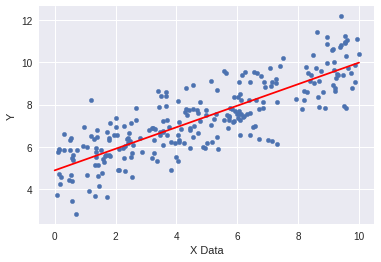

In [48]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])
y_df = pd.DataFrame(data=y_true, columns=['Y'])
my_data = pd.concat([x_df, y_df], axis=1)
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')